In [21]:
import os
import warnings

warnings.filterwarnings('ignore')
os.chdir(part)

In [22]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [23]:
pd.set_option('display.max_columns', 100)

In [24]:
data = pd.read_csv('TelecomCustomerChurn.csv')
display(data.head())

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [25]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

None

In [26]:
display(data.describe())

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [27]:
display(data.describe(include= 'O'))

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [28]:
# Add percent on each bar
def draw_percent(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        axis.annotate(percentage, (x, y), ha='center', size=10)


['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


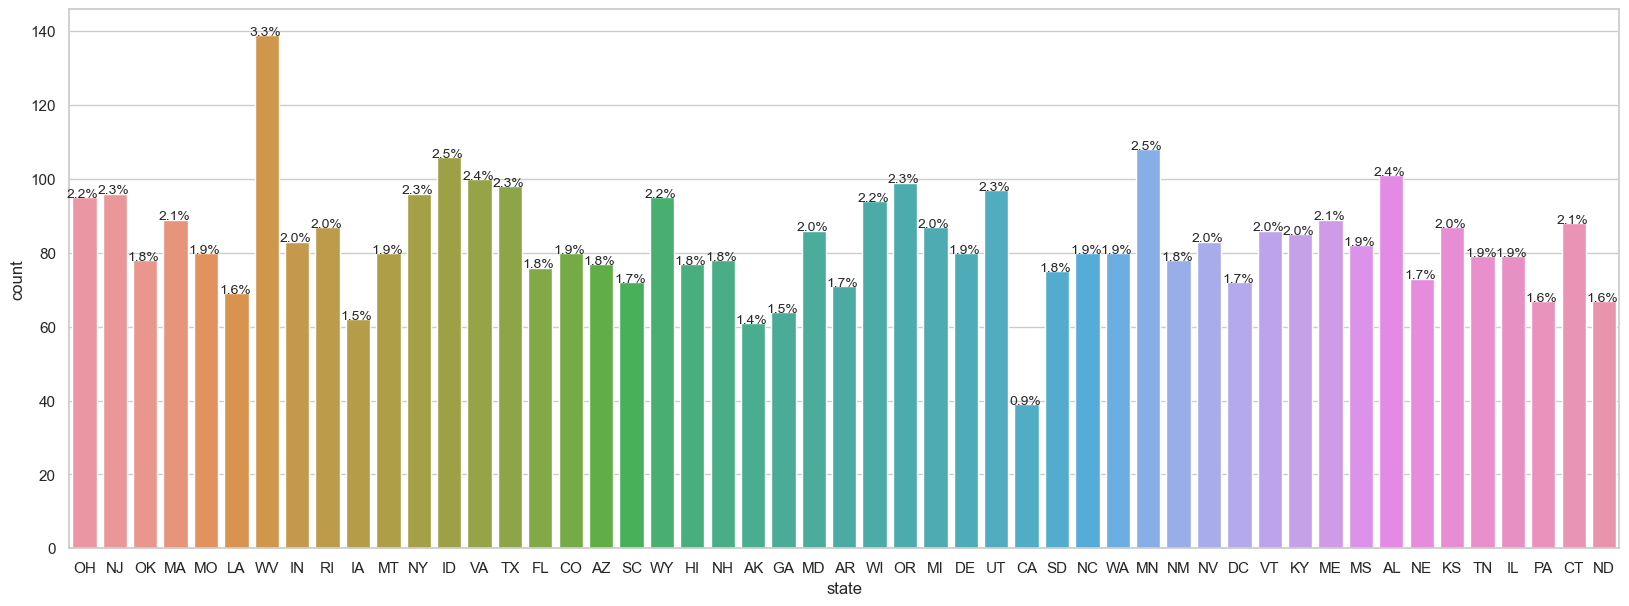

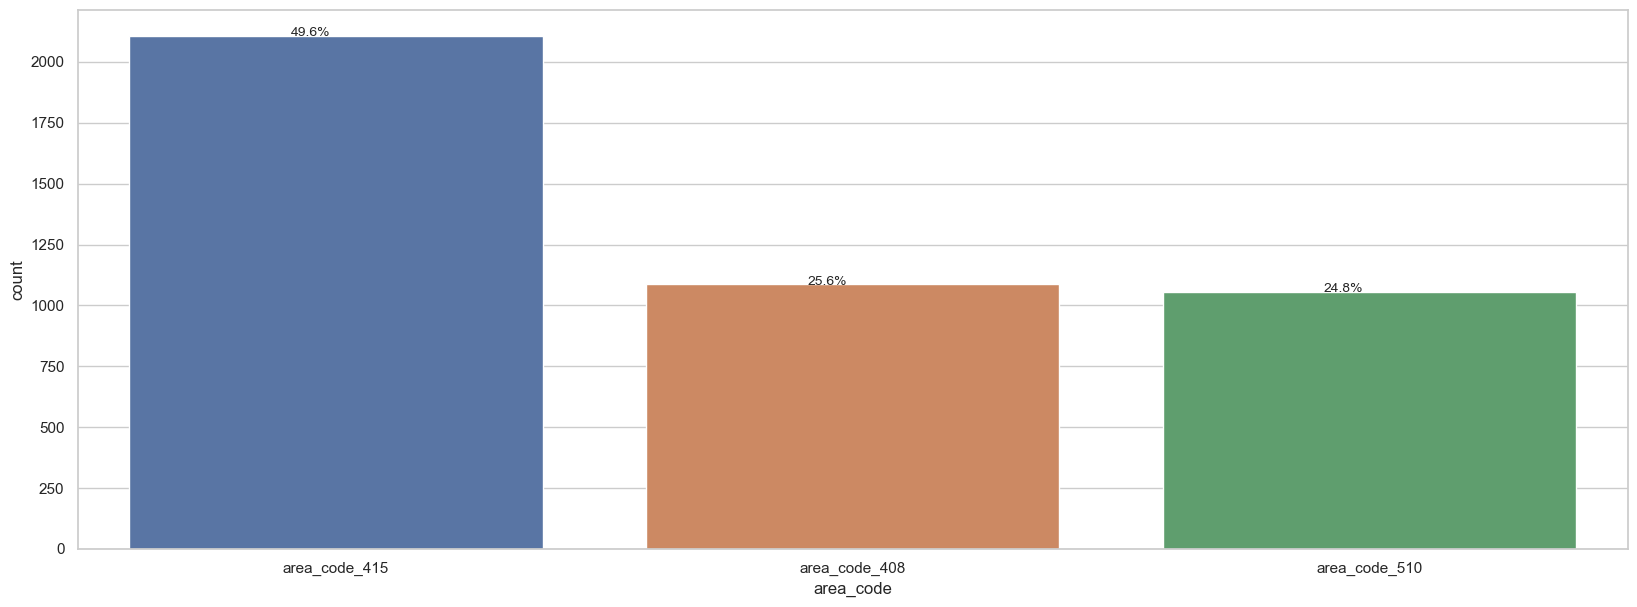

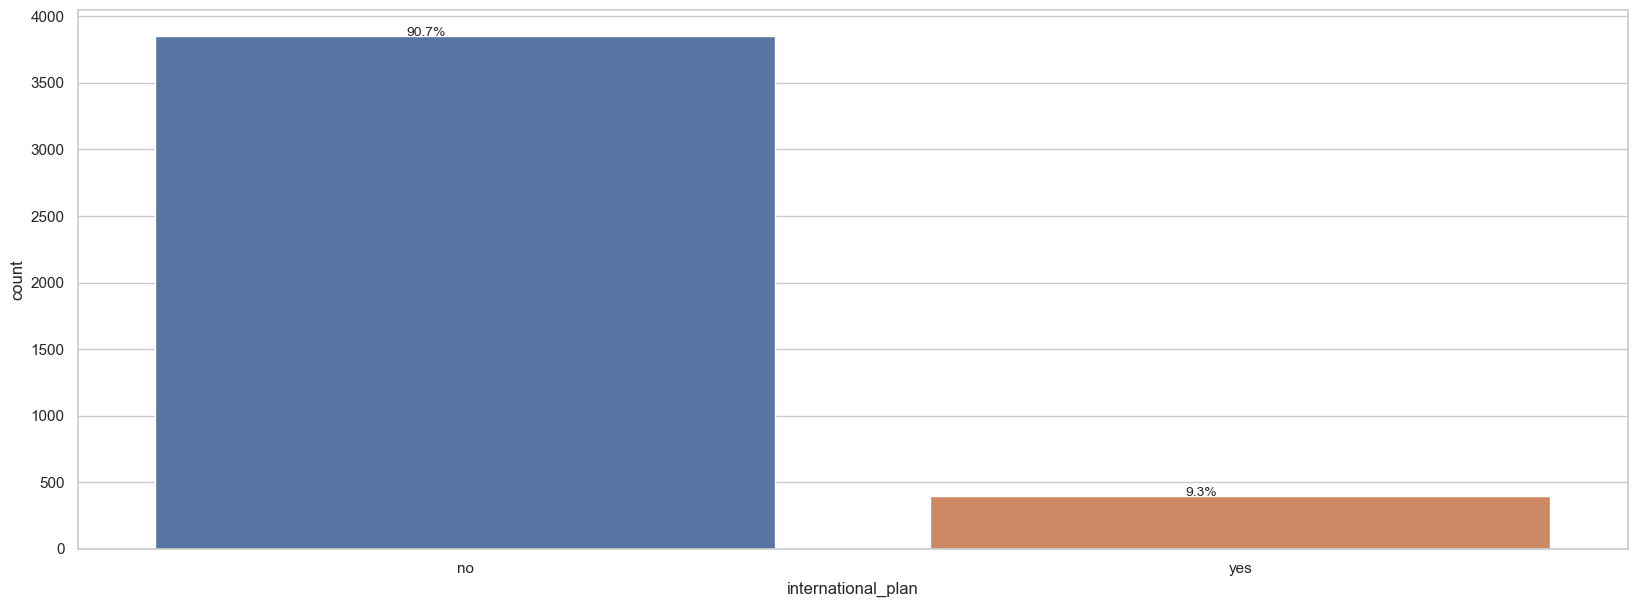

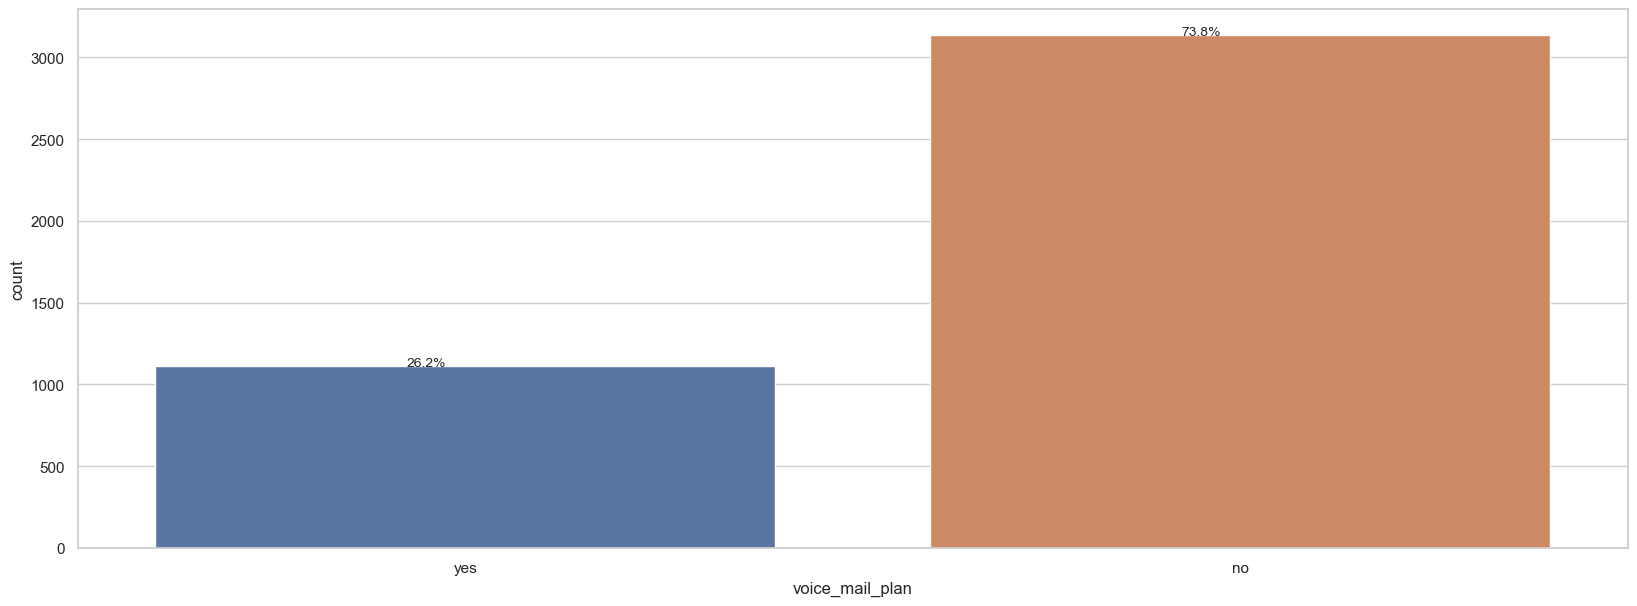

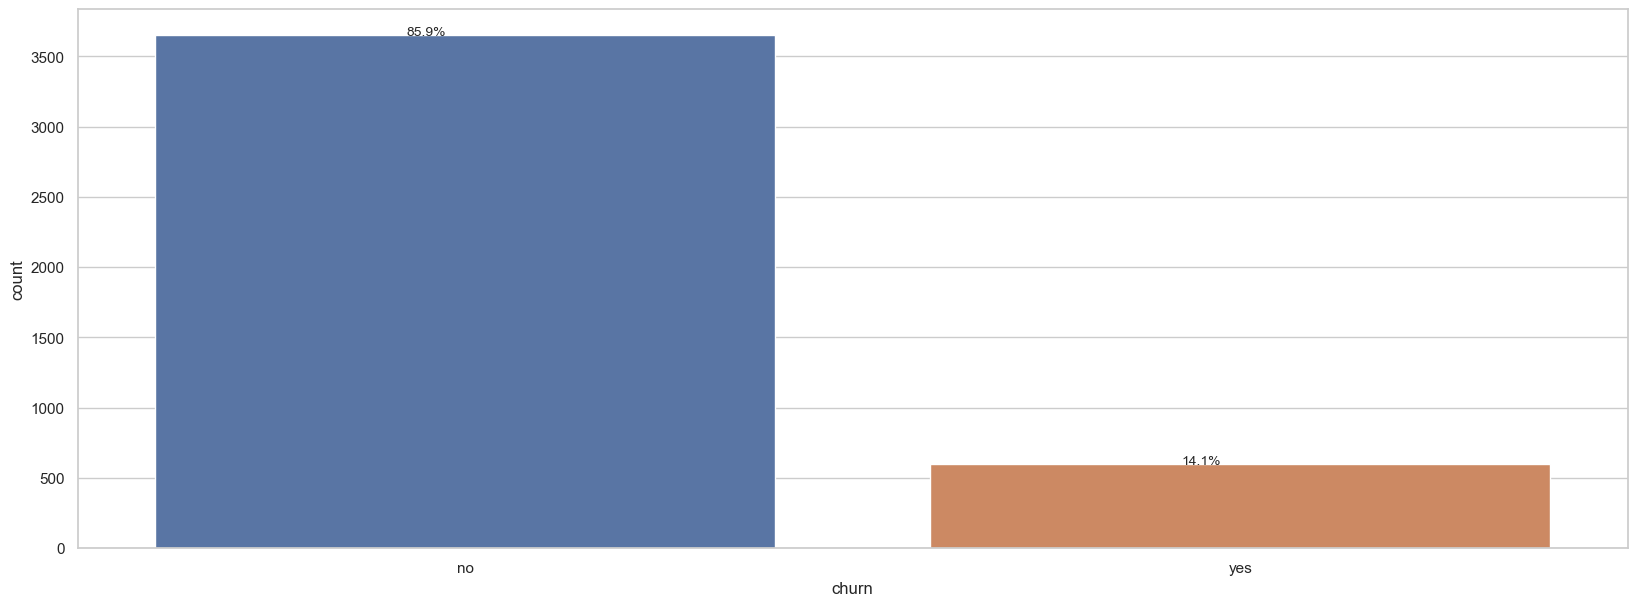

In [29]:
cate_var = [feature for feature in data.columns if data[feature].dtypes == 'O']
print(cate_var)

sns.set(style='whitegrid')
for feature in cate_var:
    plt.figure(figsize=(20, 7))
    total = float(len(data))
    ax = sns.countplot(x=feature, data=data)
    draw_percent(total, ax)
    plt.show()

In [30]:
num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
print(num_var)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


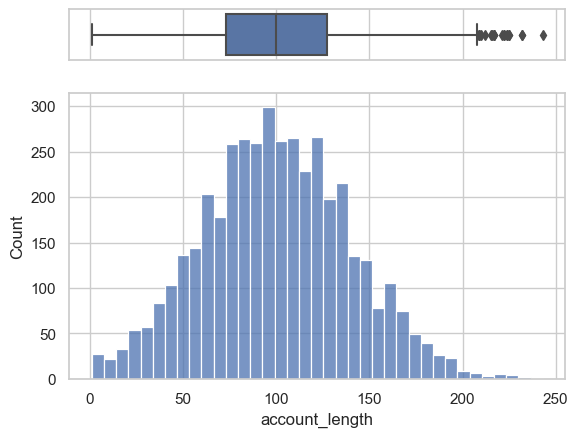

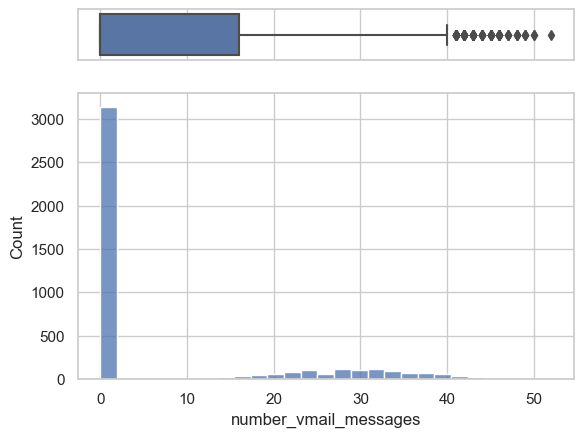

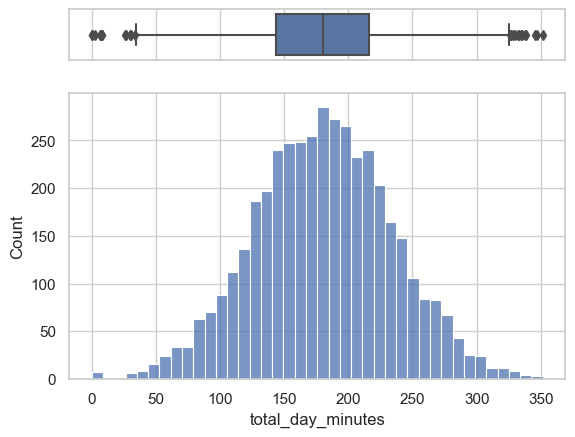

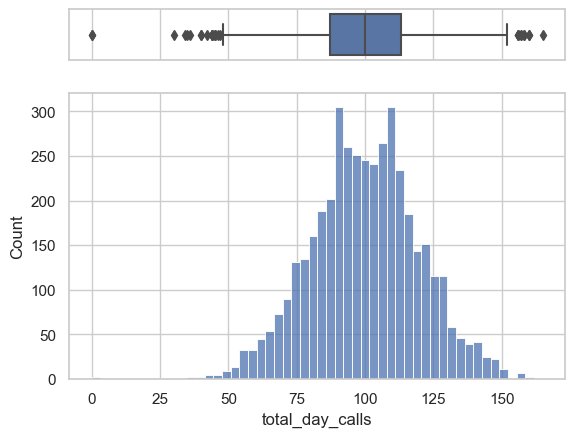

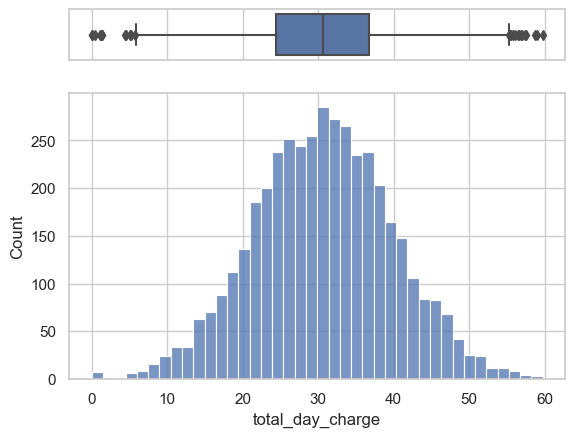

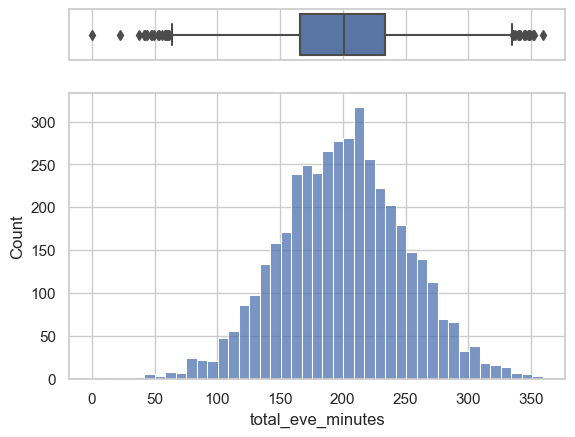

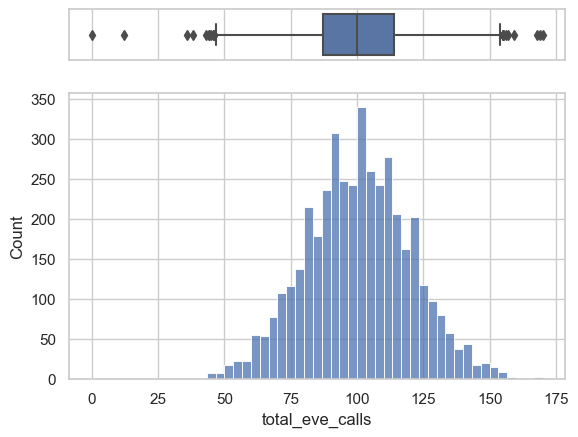

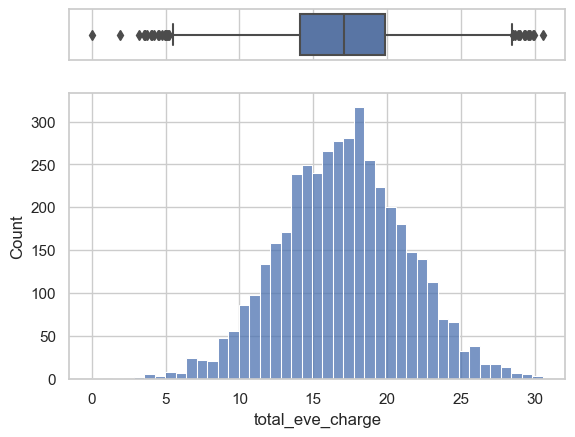

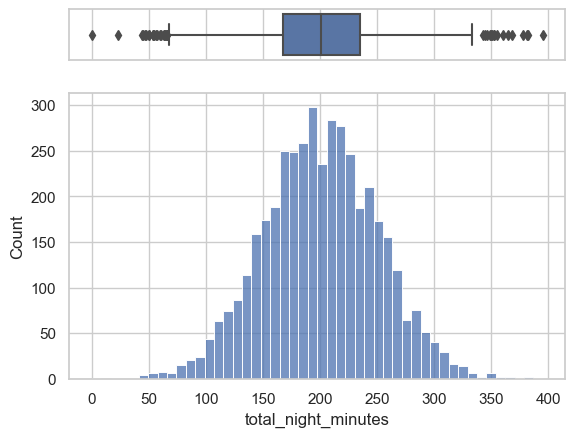

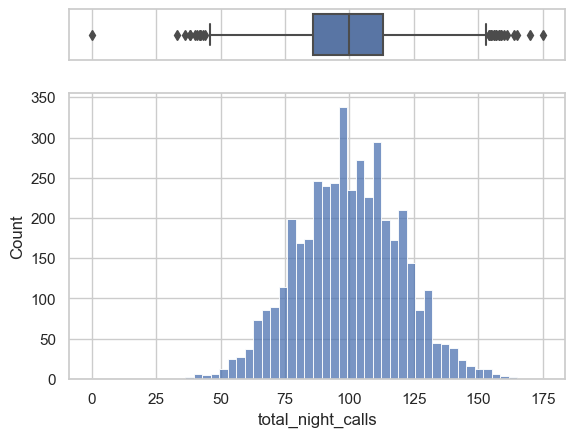

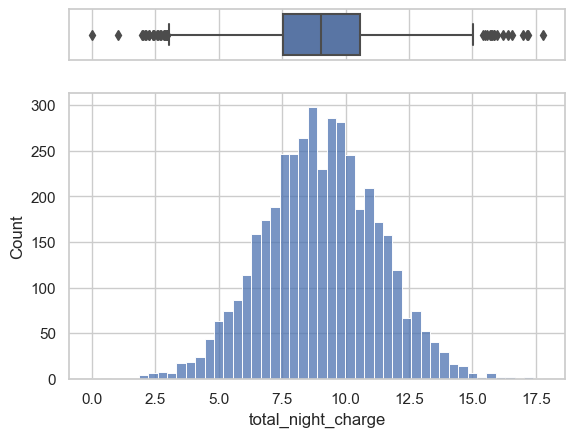

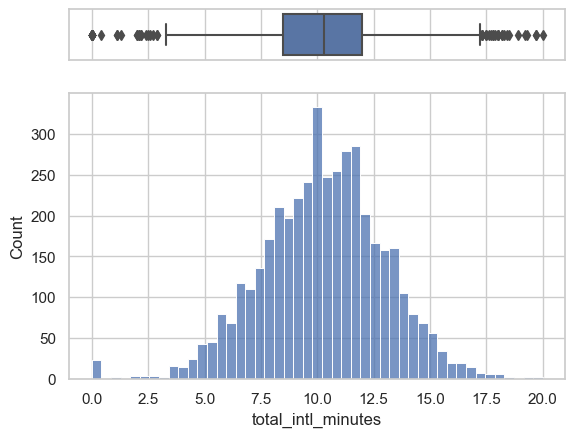

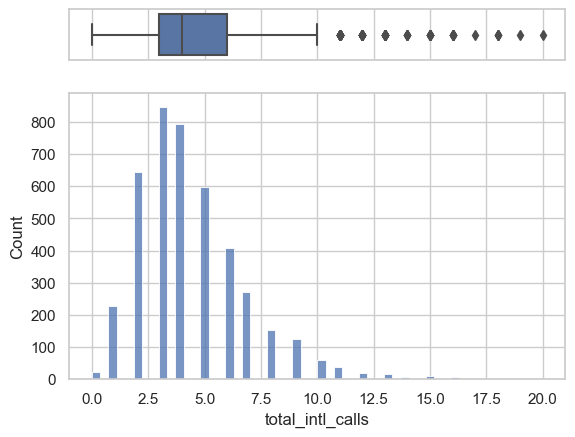

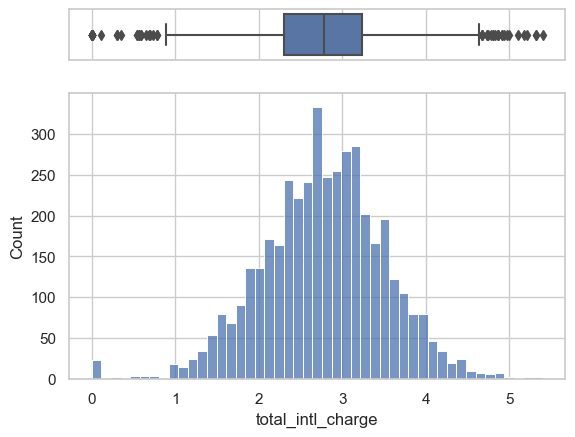

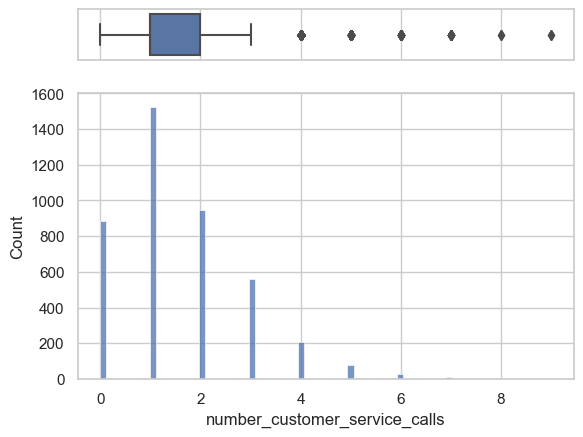

In [31]:
for feature in num_var:
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)}, sharex=True)
    
    # assigning a graph to each ax
    sns.boxplot(data=data, x=feature, ax=ax_box)
    sns.histplot(data=data, x=feature, ax=ax_hist)

    # removing x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

# BiVariate Analysis

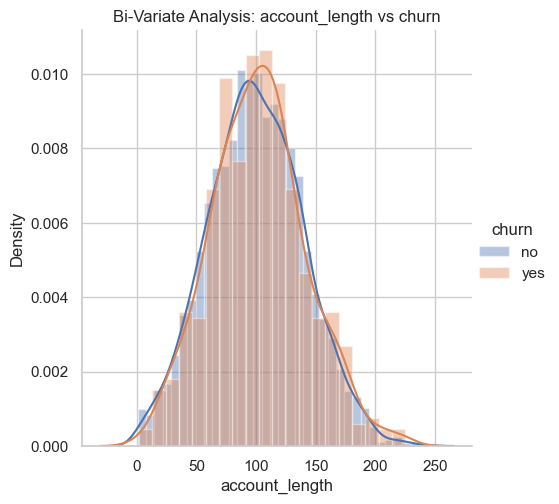

In [32]:
# BiVariate Analysis
sns.FacetGrid(data, hue='churn', height=5).map(sns.distplot, 'account_length').add_legend()
plt.title('Bi-Variate Analysis: account_length vs churn')
plt.show()

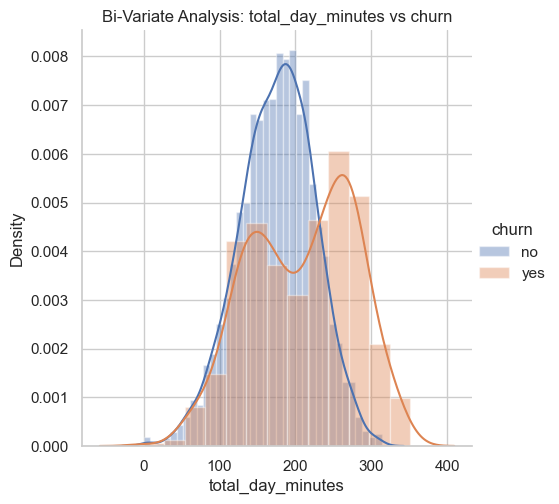

In [33]:
sns.FacetGrid(data, hue='churn', height=5).map(sns.distplot, 'total_day_minutes').add_legend()
plt.title('Bi-Variate Analysis: total_day_minutes vs churn')
plt.show()
# Số phút gọi của những người đổi nhà mạng cao hơn những người bình thương => bất thường

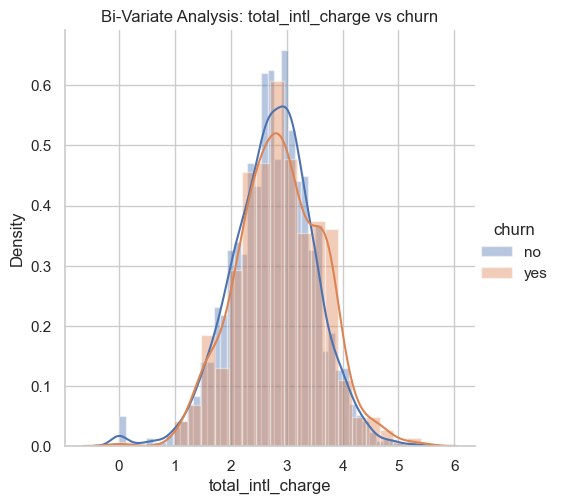

In [34]:
sns.FacetGrid(data, hue='churn', height=5).map(sns.distplot, 'total_intl_charge').add_legend()
plt.title('Bi-Variate Analysis: total_intl_charge vs churn')
plt.show()
# Nguyên nhân không phải do tiền vì số tiền của người đan dùng và rời bỏ dịch vụ là như nhau

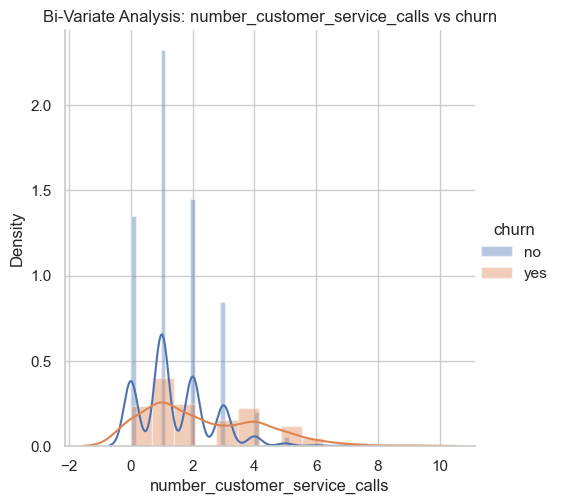

In [35]:
sns.FacetGrid(data, hue='churn', height=5).map(sns.distplot, 'number_customer_service_calls').add_legend()
plt.title('Bi-Variate Analysis: number_customer_service_calls vs churn')
plt.show()
# Từ cuọc gọi số 4 trở đi thì số người ra khỏi dịch vụ lớn

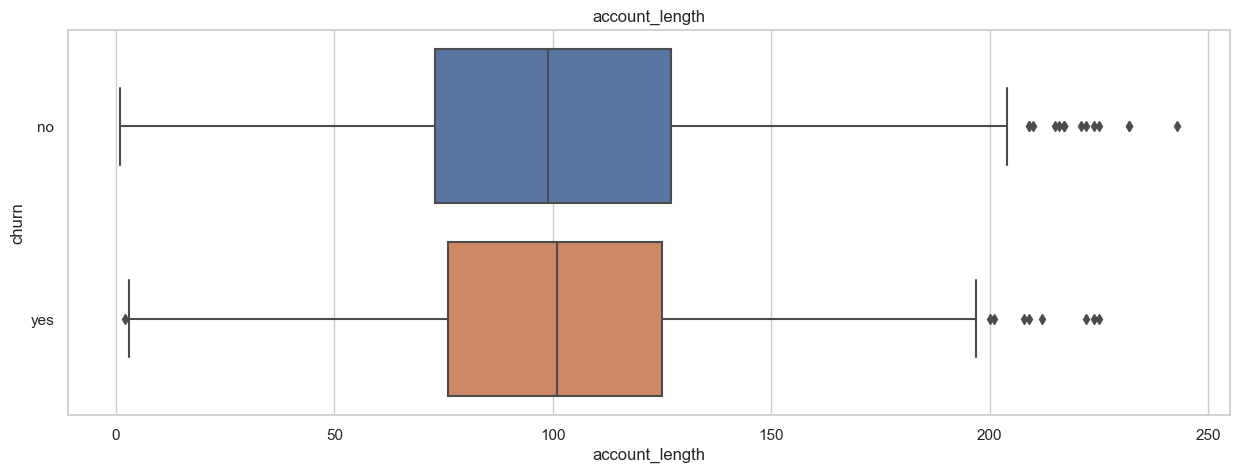

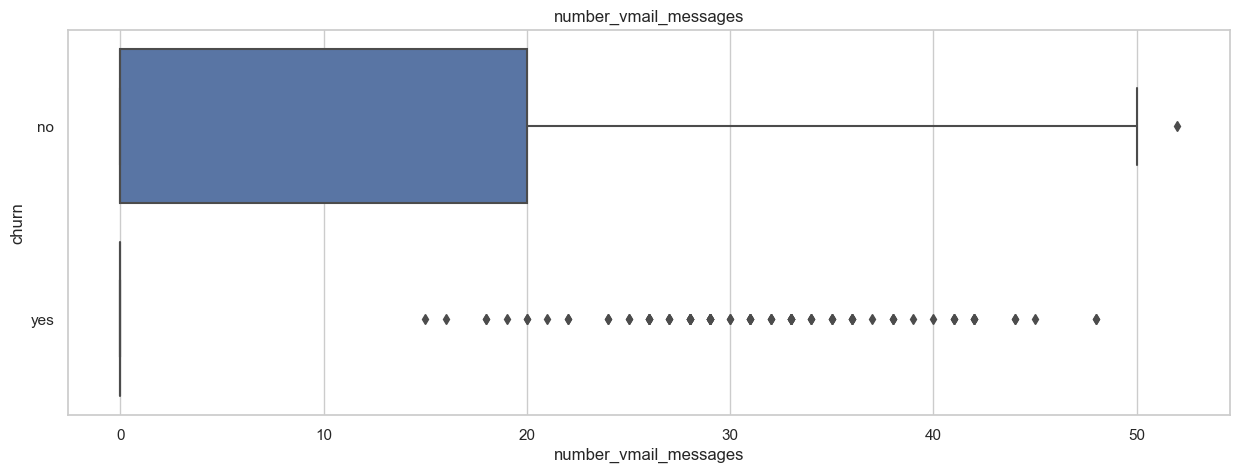

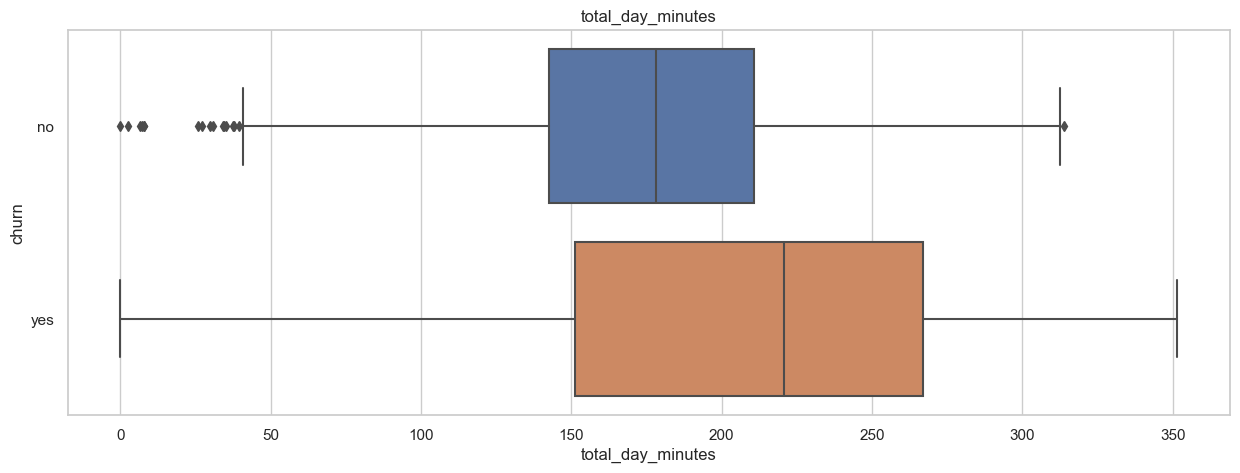

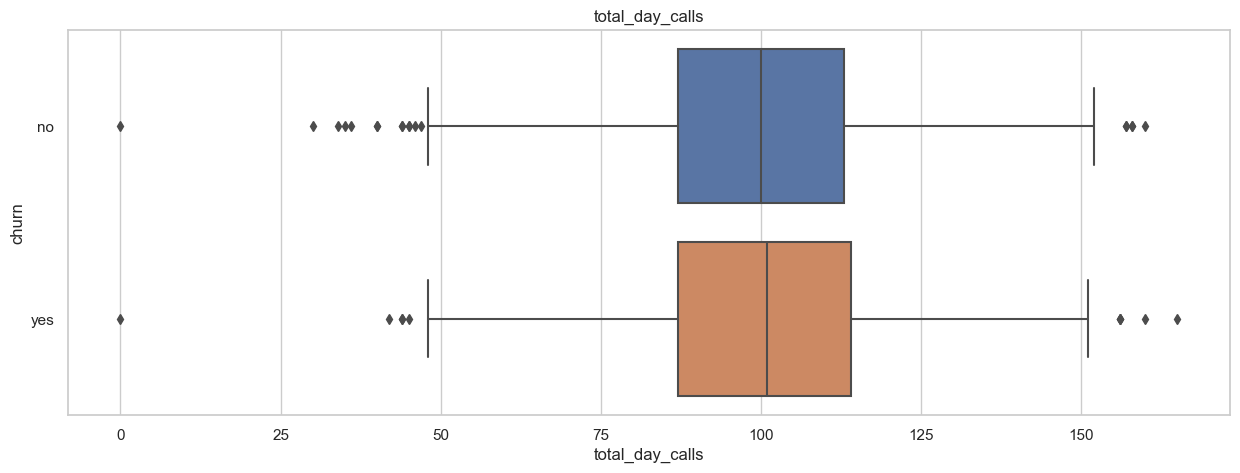

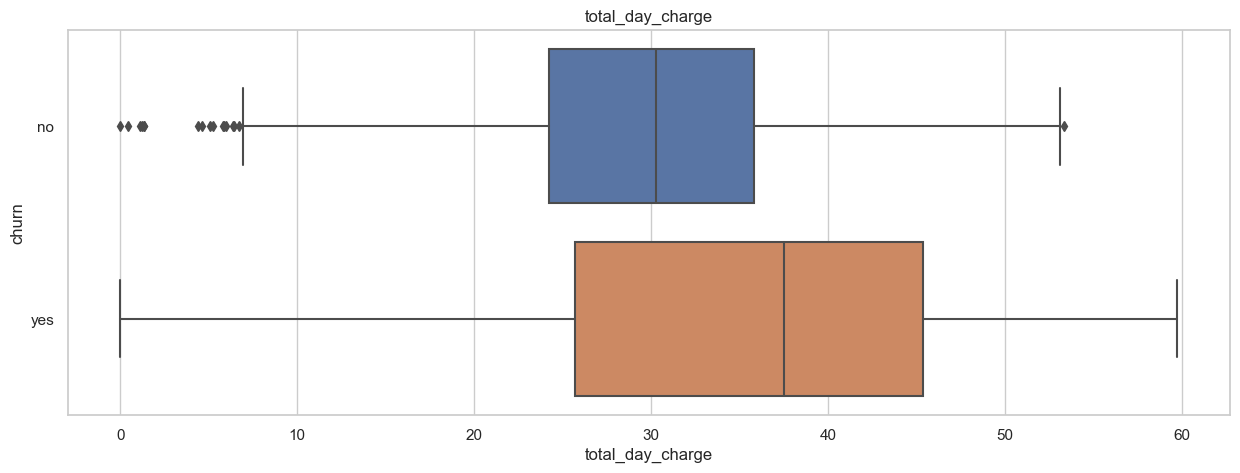

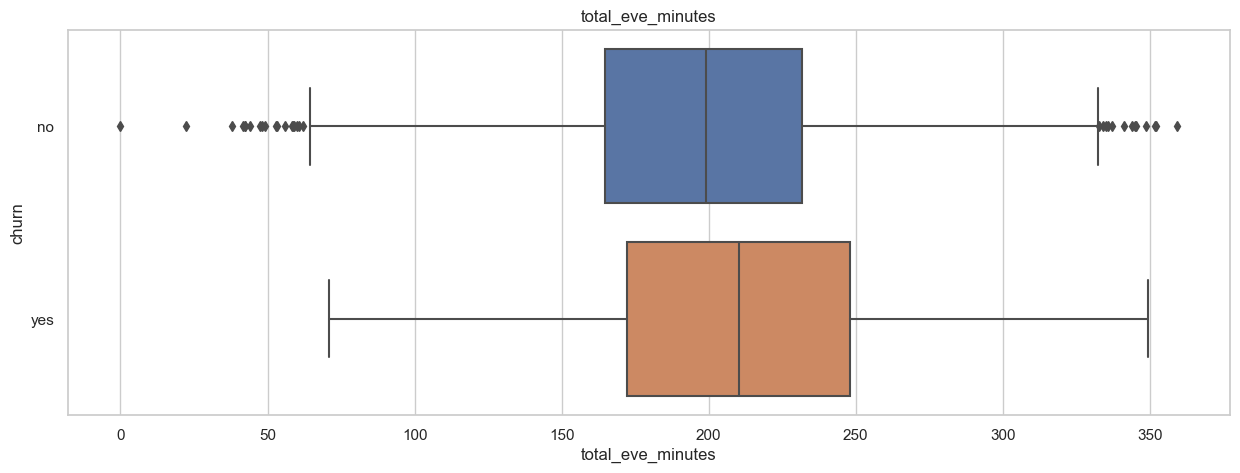

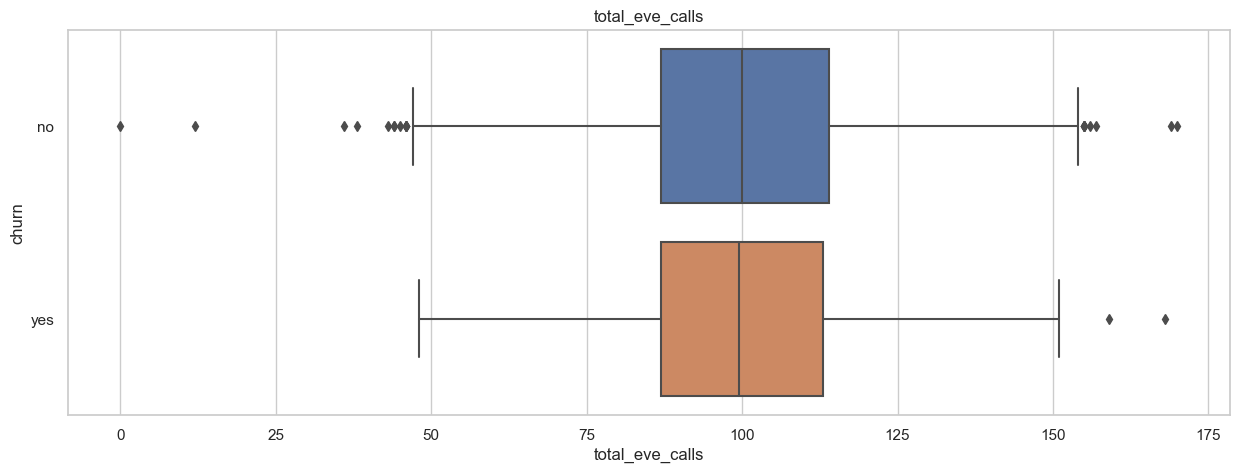

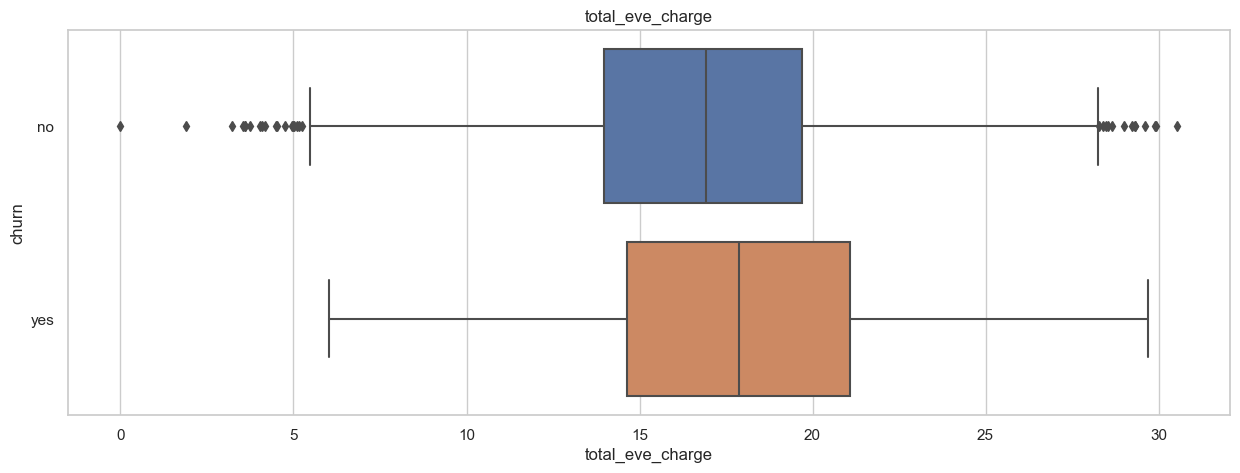

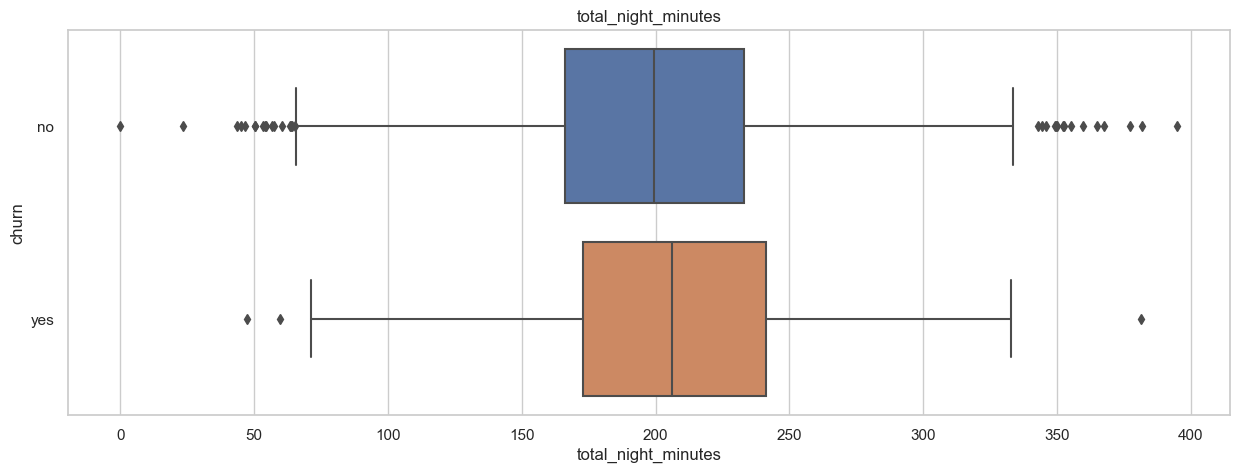

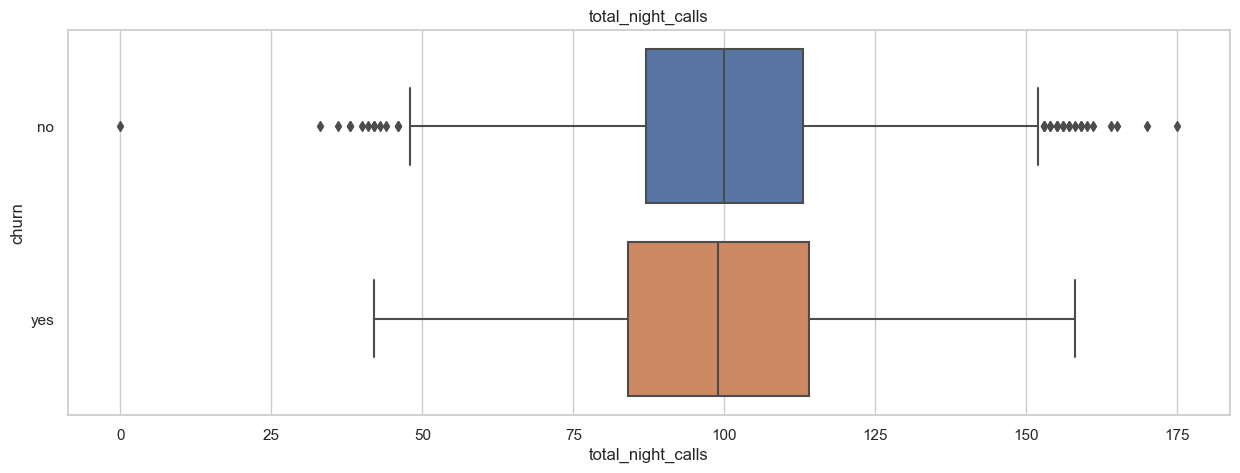

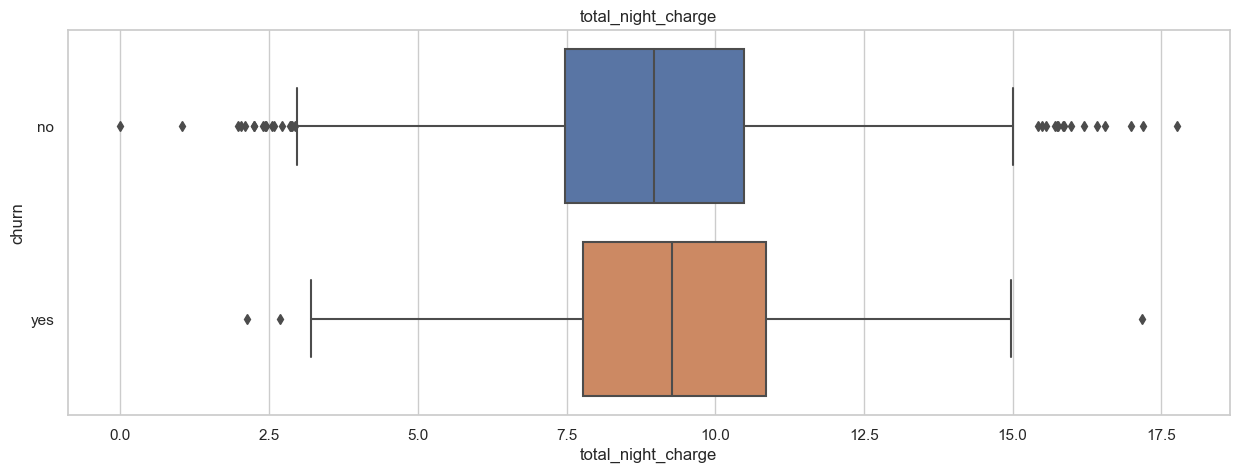

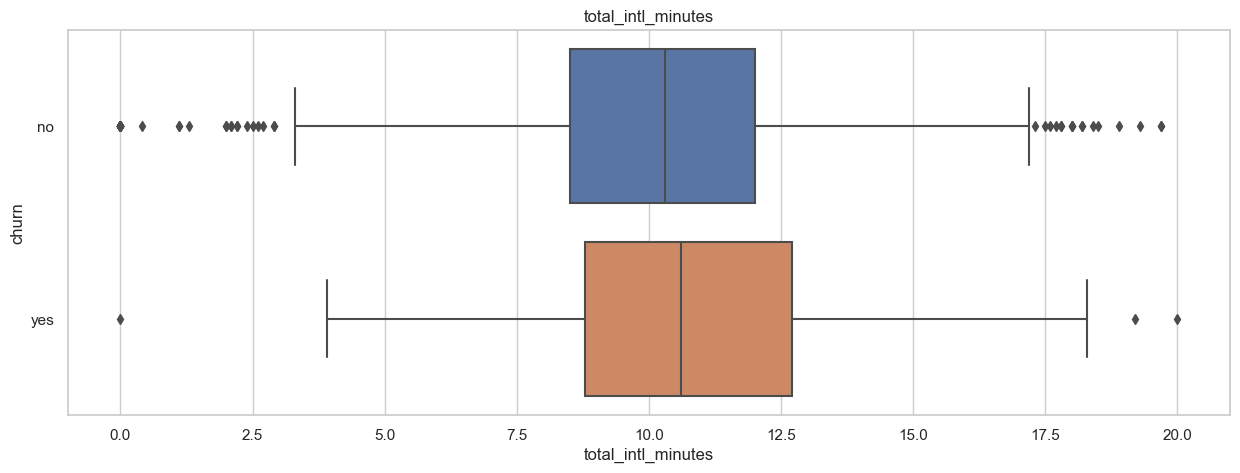

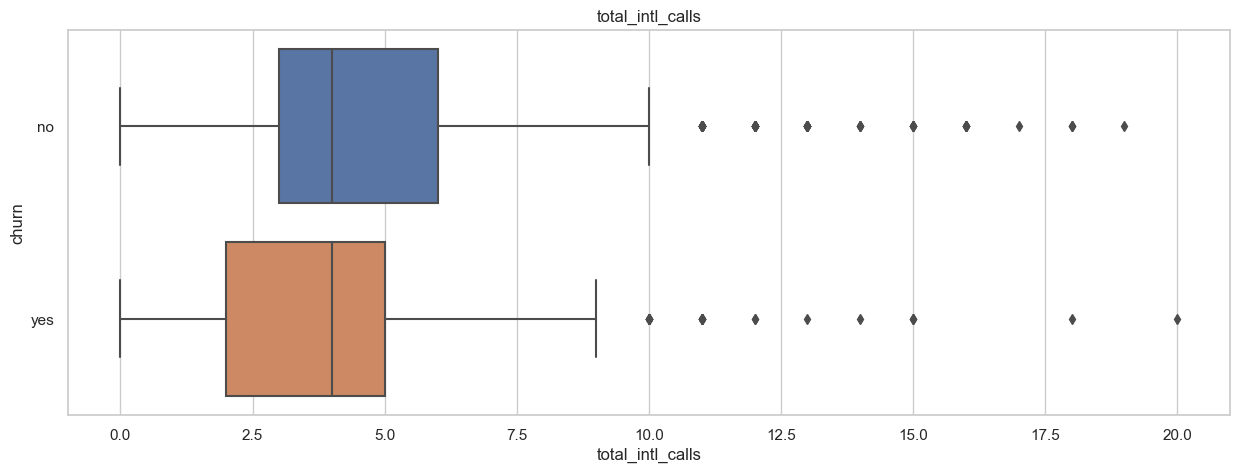

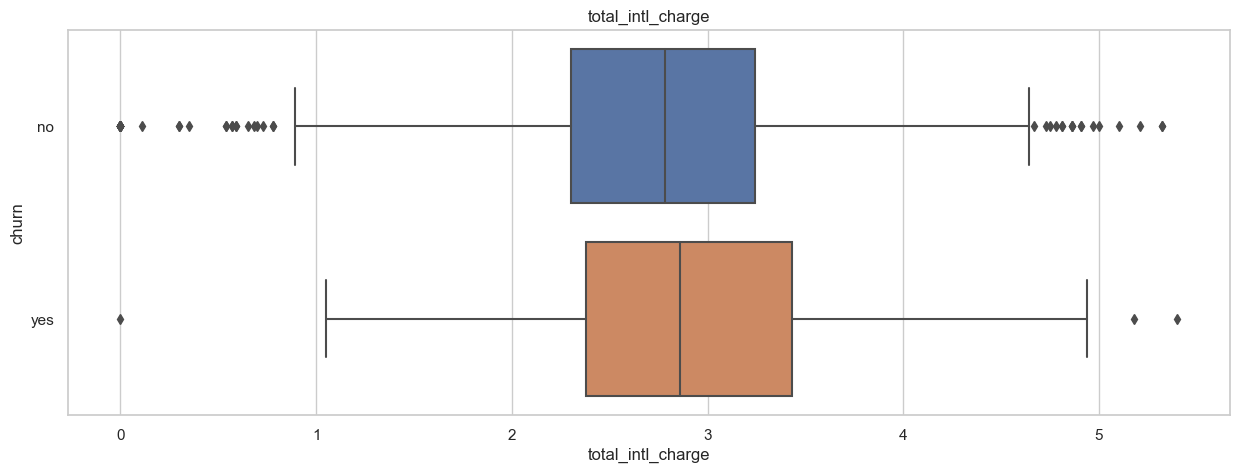

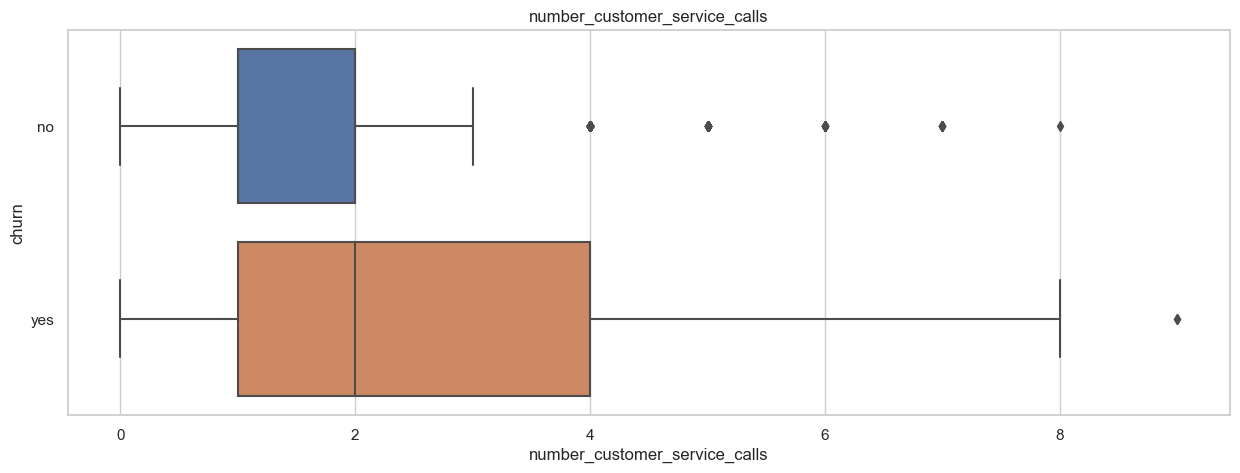

In [36]:
for feature in num_var:
    if feature != 'churn':
        plt.figure(figsize=(15, 5))
        sns.boxplot(y='churn', x=feature, data=data)
        plt.title(feature)
        plt.show()

In [37]:
num_var

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [38]:
target = 'churn'
train = data.copy()

In [40]:
def iqr_outliers_detector(data, feature, cofParm = 1.5):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - cofParm * iqr
    upper_bound = q3 + cofParm * iqr

    lower_outliers = [(idx, val) for idx, val in data[feature].iteritems() if val < lower_bound]
    upper_outliers = [(idx, val) for idx, val in data[feature].iteritems() if val > upper_bound]
    conf_range = [lower_bound, upper_bound]

    return conf_range, lower_outliers, upper_outliers

In [ ]:
def iqr_outliers_analysis(data, feature, conf_range, lower_outliers, upper_outliers):
    datavalues = data[feature]
    print('Confidence range: ', conf_range)
    print('------------------------')
    print('Len Lower outliers: ', len(lower_outliers))
    print('Lower outliers: ', lower_outliers)
    print('------------------------')
    print('Len Upper outliers: ', len(upper_outliers))
    print('Upper outliers: ', upper_outliers)


In [41]:
col_account_length = 'account_length'
data_noise = data.copy()
conf_range, lower_outliers, upper_outliers = iqr_outliers_detector(data_noise, col_account_length)

Confidence range:  [-8.0, 208.0]
Lower outliers:  []
Upper outliers:  [(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
